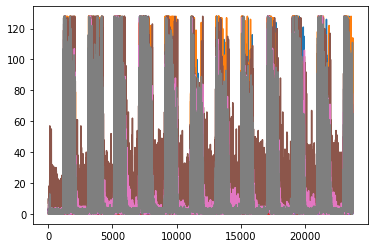

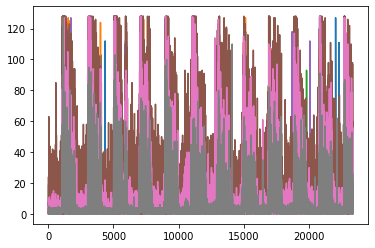

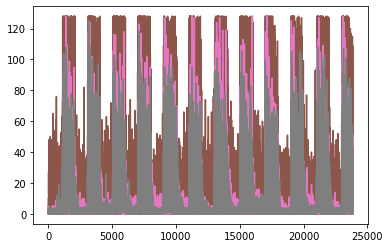

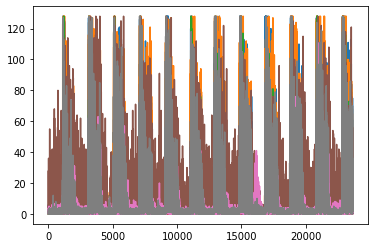

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
#读取数据
data1=pd.read_csv('ln_01.csv')
data2=pd.readv('_csln_02.csv')
data3=pd.read_csv('ln_03.csv')
data4=pd.read_csv('ln_04.csv')
data1=data1.iloc[:,1:]
data2=data2.iloc[:,1:]
data3=data3.iloc[:,1:]
data4=data4.iloc[:,1:]

data1=np.abs(data1)
data2=np.abs(data2)
data3=np.abs(data3)
data4=np.abs(data4)
data1.columns=['ch1','ch2','ch3','ch4','ch5','ch6','ch7','ch8']
data2.columns=['ch1','ch2','ch3','ch4','ch5','ch6','ch7','ch8']
data3.columns=['ch1','ch2','ch3','ch4','ch5','ch6','ch7','ch8']
data4.columns=['ch1','ch2','ch3','ch4','ch5','ch6','ch7','ch8']
names=locals()
for i in range(1,5):
    plt.figure()
    plt.plot(names['data%s'%i])

In [2]:
# 求绝对平均值
def get_mean_semg(data):
    mean_semg=[]
    for i in range(len(data)-1):
        mean_semg.append((data.ch1[i]+data.ch2[i]+data.ch3[i]+data.ch4[i]+data.ch5[i]+data.ch6[i]+data.ch7[i]+data.ch8[i])/8)
    return mean_semg

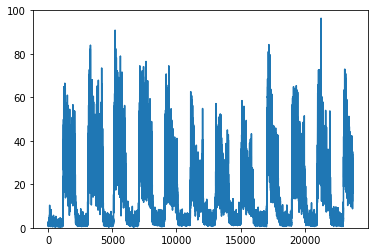

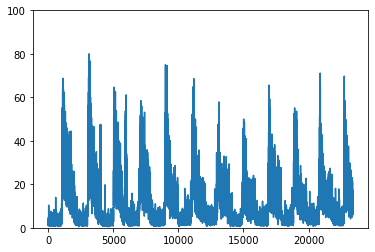

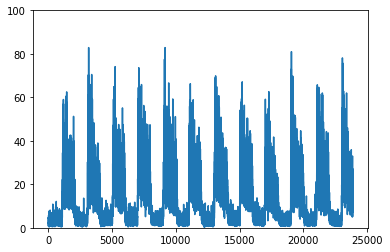

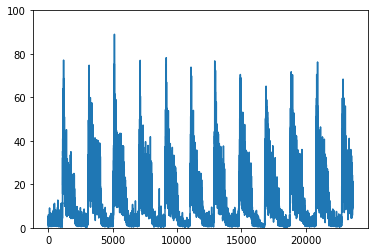

In [3]:
for i in range(1,5):
    names['mean_semg_%s'%i]=get_mean_semg(names['data%s'%i])
    plt.figure()
    plt.plot(names['mean_semg_%s'%i])
    plt.ylim(0,100)
    plt.savefig('a%s'%i,dpi=40)

In [4]:
def get_move_window(mean_semg):
    mean_semg_pf=pd.Series(mean_semg)
    return mean_semg_pf.rolling(800).mean()

In [5]:
#大于阈值返回1,小于阈值返回0
def get_break(data,i,thre,windowlenth):
    for i in range(i,i+windowlenth):
        if data[i]<thre:
            return 0
    return 1

In [6]:
#移动窗函数法,我取得的阈值是20,窗函数大小为800
for i in range(1,5):
    names['move_averge_%s'%i]=get_move_window(names['mean_semg_%s'%i])
    names['sta_%s'%i]=[]
    names['end_%s'%i]=[]
    thre=5
    windowlenth=800
    for j in range(len(names['move_averge_%s'%i])-1):
        if j+windowlenth >= len(names['move_averge_%s'%i]):
            break
        else:
            if get_break(names['move_averge_%s'%i],j,thre,windowlenth)==0 and get_break(names['move_averge_%s'%i],j+1,thre,windowlenth)==1:
                names['sta_%s'%i].append(j)#如果j时小于阈值,j+1大于阈值,那么就把对应的时间戳记录到sta[]
            if get_break(names['move_averge_%s'%i],j,thre,windowlenth)==1 and get_break(names['move_averge_%s'%i],j+1,thre,windowlenth)==0:
                names['end_%s'%i].append(j)#如果j时大于阈值,j+1小于阈值,那么就把对应的时间戳记录到end[]


In [7]:
#分割
for i in range(1,5):
    names['period_%s'%i]=[]
    names['sta_filt_%s'%i]=[]
    names['end_filt_%s'%i]=[]
    for j in range(len(names['sta_%s'%i])):
        names['period_%s'%i].append(names['end_%s'%i][j]-names['sta_%s'%i][j]) #period=end-start
    for k in range(len(names['period_%s'%i])):
        if names['period_%s'%i][k]>80: #设定时间戳长度,如果小于这个长度,就不会被记录
            names['sta_filt_%s'%i].append(names['sta_%s'%i][k])
            names['end_filt_%s'%i].append(names['end_%s'%i][k])
for i in range(1,len(sta_filt_1)+1):
    names['data1_cut%s'%i]=data1[sta_filt_1[i-1]:end_filt_1[i-1]]
for i in range(1,len(sta_filt_2)+1):
    names['data2_cut%s'%i]=data2[sta_filt_2[i-1]:end_filt_2[i-1]]
for i in range(1,len(sta_filt_3)+1):
    names['data3_cut%s'%i]=data3[sta_filt_3[i-1]:end_filt_3[i-1]]
for i in range(1,len(sta_filt_4)+1):
    names['data4_cut%s'%i]=data4[sta_filt_4[i-1]:end_filt_4[i-1]]

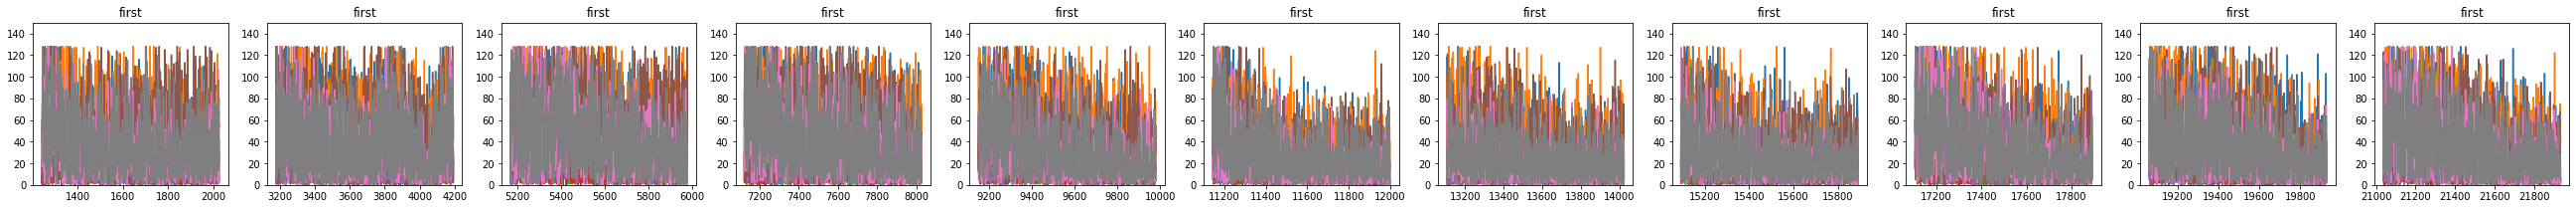

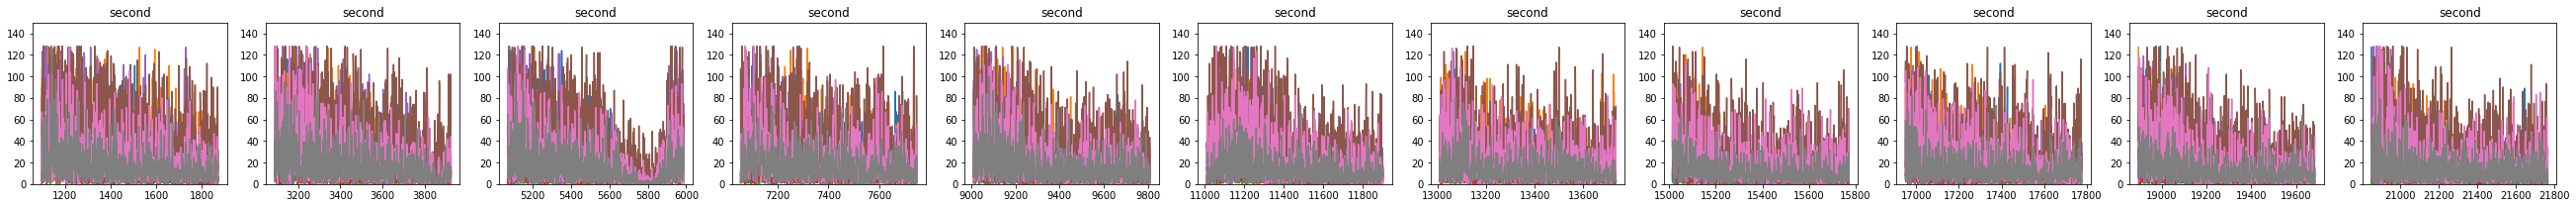

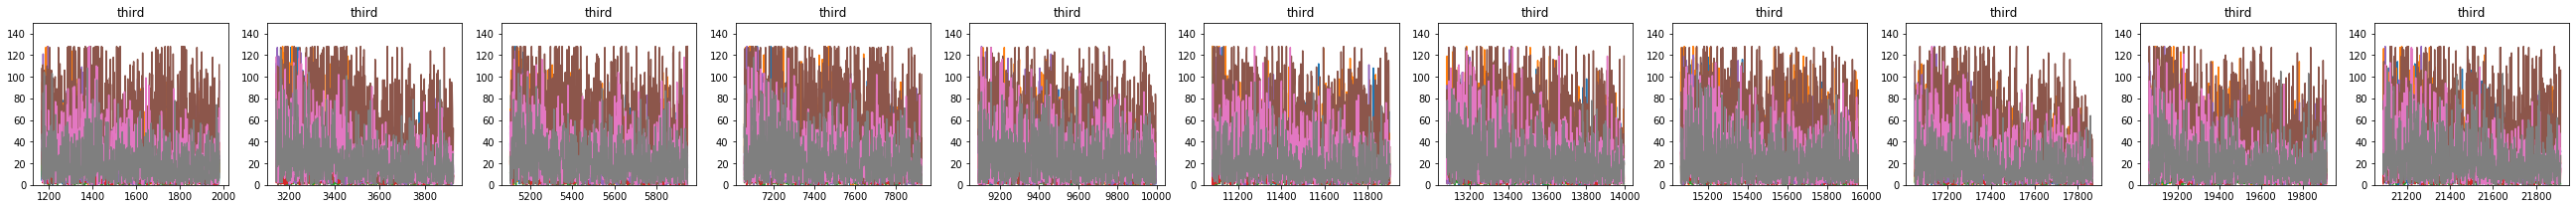

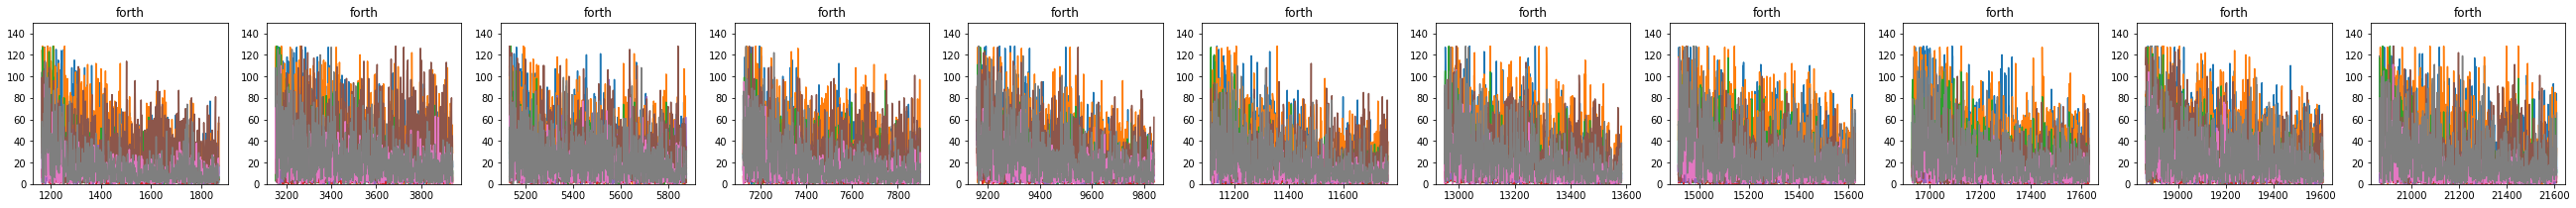

In [8]:
plt.figure(figsize=(50,3))
for i in range(1,12):
    plt.subplot2grid((1,12),(0,i-1),colspan=1).plot(names['data1_cut%s'%i])
    plt.ylim(0,150)
    plt.title('first')
plt.figure(figsize=(50,3))
for i in range(1,12):
    plt.subplot2grid((1,12),(0,i-1),colspan=1).plot(names['data2_cut%s'%i])
    plt.ylim(0,150)
    plt.title('second')
plt.figure(figsize=(50,3))
for i in range(1,12):
    plt.subplot2grid((1,12),(0,i-1),colspan=1).plot(names['data3_cut%s'%i])
    plt.ylim(0,150)
    plt.title('third')
plt.figure(figsize=(50,3))
for i in range(1,12):
    plt.subplot2grid((1,12),(0,i-1),colspan=1).plot(names['data4_cut%s'%i])
    plt.ylim(0,150)
    plt.title('forth')

In [9]:
mav_first=pd.DataFrame(columns=['ch1','ch2','ch3','ch4','ch5','ch6','ch7','ch8'],index=[np.arange(11)])
for i in range(1,12):
    mav_first.loc[i-1,'ch1']=names['data1_cut%s'%i].ch1.mean()
    mav_first.loc[i-1,'ch2']=names['data1_cut%s'%i].ch2.mean()
    mav_first.loc[i-1,'ch3']=names['data1_cut%s'%i].ch3.mean()
    mav_first.loc[i-1,'ch4']=names['data1_cut%s'%i].ch4.mean()
    mav_first.loc[i-1,'ch5']=names['data1_cut%s'%i].ch5.mean()
    mav_first.loc[i-1,'ch6']=names['data1_cut%s'%i].ch6.mean()
    mav_first.loc[i-1,'ch7']=names['data1_cut%s'%i].ch7.mean()
    mav_first.loc[i-1,'ch8']=names['data1_cut%s'%i].ch8.mean()
mav_second=pd.DataFrame(columns=['ch1','ch2','ch3','ch4','ch5','ch6','ch7','ch8'],index=[np.arange(11)])
for i in range(1,12):
    mav_second.loc[i-1,'ch1']=names['data2_cut%s'%i].ch1.mean()
    mav_second.loc[i-1,'ch2']=names['data2_cut%s'%i].ch2.mean()
    mav_second.loc[i-1,'ch3']=names['data2_cut%s'%i].ch3.mean()
    mav_second.loc[i-1,'ch4']=names['data2_cut%s'%i].ch4.mean()
    mav_second.loc[i-1,'ch5']=names['data2_cut%s'%i].ch5.mean()
    mav_second.loc[i-1,'ch6']=names['data2_cut%s'%i].ch6.mean()
    mav_second.loc[i-1,'ch7']=names['data2_cut%s'%i].ch7.mean()
    mav_second.loc[i-1,'ch8']=names['data2_cut%s'%i].ch8.mean()
mav_third=pd.DataFrame(columns=['ch1','ch2','ch3','ch4','ch5','ch6','ch7','ch8'],index=[np.arange(11)])
for i in range(1,12):
    mav_third.loc[i-1,'ch1']=names['data3_cut%s'%i].ch1.mean()
    mav_third.loc[i-1,'ch2']=names['data3_cut%s'%i].ch2.mean()
    mav_third.loc[i-1,'ch3']=names['data3_cut%s'%i].ch3.mean()
    mav_third.loc[i-1,'ch4']=names['data3_cut%s'%i].ch4.mean()
    mav_third.loc[i-1,'ch5']=names['data3_cut%s'%i].ch5.mean()
    mav_third.loc[i-1,'ch6']=names['data3_cut%s'%i].ch6.mean()
    mav_third.loc[i-1,'ch7']=names['data3_cut%s'%i].ch7.mean()
    mav_third.loc[i-1,'ch8']=names['data3_cut%s'%i].ch8.mean()
mav_forth=pd.DataFrame(columns=['ch1','ch2','ch3','ch4','ch5','ch6','ch7','ch8'],index=[np.arange(11)])
for i in range(1,12):
    mav_forth.loc[i-1,'ch1']=names['data4_cut%s'%i].ch1.mean()
    mav_forth.loc[i-1,'ch2']=names['data4_cut%s'%i].ch2.mean()
    mav_forth.loc[i-1,'ch3']=names['data4_cut%s'%i].ch3.mean()
    mav_forth.loc[i-1,'ch4']=names['data4_cut%s'%i].ch4.mean()
    mav_forth.loc[i-1,'ch5']=names['data4_cut%s'%i].ch5.mean()
    mav_forth.loc[i-1,'ch6']=names['data4_cut%s'%i].ch6.mean()
    mav_forth.loc[i-1,'ch7']=names['data4_cut%s'%i].ch7.mean()
    mav_forth.loc[i-1,'ch8']=names['data4_cut%s'%i].ch8.mean()

In [10]:
mav_first.ch1

0     36.5629
1     42.9686
2     44.8446
3     43.5623
4     36.0204
5     27.6935
6     28.4843
7     33.0751
8     37.9822
9     38.1107
10    41.1456
Name: ch1, dtype: object

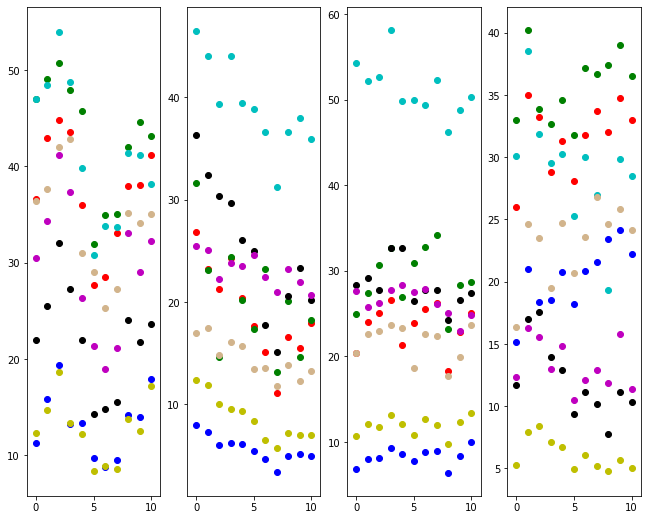

In [11]:
plt.figure(figsize=(11,9))
mav_first_ax=plt.subplot2grid((1,4),(0,0),colspan=1)
mav_first_ax.scatter(x=np.arange(11),y=mav_first.ch1,c='r')
mav_first_ax.scatter(x=np.arange(11),y=mav_first.ch2,c='g')
mav_first_ax.scatter(x=np.arange(11),y=mav_first.ch3,c='b')
mav_first_ax.scatter(x=np.arange(11),y=mav_first.ch4,c='y')
mav_first_ax.scatter(x=np.arange(11),y=mav_first.ch5,c='k')
mav_first_ax.scatter(x=np.arange(11),y=mav_first.ch6,c='c')
mav_first_ax.scatter(x=np.arange(11),y=mav_first.ch7,c='m')
mav_first_ax.scatter(x=np.arange(11),y=mav_first.ch8,c='tan')
mav_second_ax=plt.subplot2grid((1,4),(0,1),colspan=1)
mav_second_ax.scatter(x=np.arange(11),y=mav_second.ch1,c='r')
mav_second_ax.scatter(x=np.arange(11),y=mav_second.ch2,c='g')
mav_second_ax.scatter(x=np.arange(11),y=mav_second.ch3,c='b')
mav_second_ax.scatter(x=np.arange(11),y=mav_second.ch4,c='y')
mav_second_ax.scatter(x=np.arange(11),y=mav_second.ch5,c='k')
mav_second_ax.scatter(x=np.arange(11),y=mav_second.ch6,c='c')
mav_second_ax.scatter(x=np.arange(11),y=mav_second.ch7,c='m')
mav_second_ax.scatter(x=np.arange(11),y=mav_second.ch8,c='tan')
mav_third_ax=plt.subplot2grid((1,4),(0,2),colspan=1)
mav_third_ax.scatter(x=np.arange(11),y=mav_third.ch1,c='r')
mav_third_ax.scatter(x=np.arange(11),y=mav_third.ch2,c='g')
mav_third_ax.scatter(x=np.arange(11),y=mav_third.ch3,c='b')
mav_third_ax.scatter(x=np.arange(11),y=mav_third.ch4,c='y')
mav_third_ax.scatter(x=np.arange(11),y=mav_third.ch5,c='k')
mav_third_ax.scatter(x=np.arange(11),y=mav_third.ch6,c='c')
mav_third_ax.scatter(x=np.arange(11),y=mav_third.ch7,c='m')
mav_third_ax.scatter(x=np.arange(11),y=mav_third.ch8,c='tan')
mav_forth_ax=plt.subplot2grid((1,4),(0,3),colspan=1)
mav_forth_ax.scatter(x=np.arange(11),y=mav_forth.ch1,c='r')
mav_forth_ax.scatter(x=np.arange(11),y=mav_forth.ch2,c='g')
mav_forth_ax.scatter(x=np.arange(11),y=mav_forth.ch3,c='b')
mav_forth_ax.scatter(x=np.arange(11),y=mav_forth.ch4,c='y')
mav_forth_ax.scatter(x=np.arange(11),y=mav_forth.ch5,c='k')
mav_forth_ax.scatter(x=np.arange(11),y=mav_forth.ch6,c='c')
mav_forth_ax.scatter(x=np.arange(11),y=mav_forth.ch7,c='m')
mav_forth_ax.scatter(x=np.arange(11),y=mav_forth.ch8,c='tan')

In [14]:
mav_first['action']=0
mav_second['action']=1
mav_third['action']=2
mav_forth['action']=3
sumup=mav_first.append([mav_second,mav_third,mav_forth],ignore_index=True)
y=sumup.action
x=sumup.drop(['action'],axis=1)

from sklearn.model_selection import train_test_split
import xgboost as xgb
train_x,test_x,train_y,test_y=train_test_split(x.values,y.values,test_size=0.5)
xg_train=xgb.DMatrix(train_x,label=train_y)
xg_test=xgb.DMatrix(test_x,label=test_y)
param = {}

param['objective'] ='multi:softmax' #方法和目标

param['eta']=0.003  #学习速率，大了容易过拟合，小了训练时间长
param['max_depth']=6
param['silent']=1
param['nthread']=4
param['num_class']=4 #类的数目
watchlist = [(xg_train, 'train'), (xg_test, 'test')]
num_round=11
bst = xgb.train(param, xg_train, num_round, watchlist)
pred = bst.predict(xg_test)

[0]	train-merror:0.045455	test-merror:0.227273
[1]	train-merror:0	test-merror:0.136364
[2]	train-merror:0	test-merror:0.136364
[3]	train-merror:0	test-merror:0.136364
[4]	train-merror:0	test-merror:0.136364
[5]	train-merror:0	test-merror:0.136364
[6]	train-merror:0	test-merror:0.136364
[7]	train-merror:0	test-merror:0.136364
[8]	train-merror:0	test-merror:0.136364
[9]	train-merror:0	test-merror:0.136364
[10]	train-merror:0	test-merror:0.136364


In [15]:
import numpy as np
import pandas as pd
from sklearn import neighbors
from sklearn.preprocessing import OneHotEncoder #预处理模块
from sklearn.model_selection import train_test_split #自动生成训练集和测试集模块
from sklearn.metrics import classification_report #结果预估评测模块
from sklearn.neighbors import KNeighborsClassifier #K近邻分类器
from sklearn.tree import DecisionTreeClassifier #决策树
from sklearn.naive_bayes import GaussianNB #朴素贝叶斯
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score,precision_score,recall_score

if __name__== '__main__':    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)
    print('Start training knn')
    knn=KNeighborsClassifier(n_neighbors=5).fit(x_train,y_train)
    print('Training done!')
    answer_knn= knn.predict(x_test)
    print('Prediction done!')  
print('\n\nThe classification report for knn:')
print(classification_report(y_test,answer_knn))

Start training knn
Training done!
Prediction done!


The classification report for knn:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       1.00      0.60      0.75         5
           2       0.60      1.00      0.75         3
           3       0.78      1.00      0.88         7

    accuracy                           0.82        22
   macro avg       0.84      0.83      0.80        22
weighted avg       0.87      0.82      0.82        22



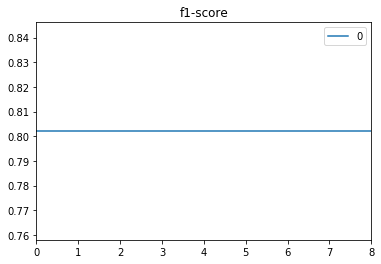

In [16]:
F1 = []
Precision = []
Recall = []
for n_neighbors in range(1,10):
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')  # 测试不同的K 对最终结果的影响
    clf.fit(x_train, y_train)  # 训练器
    answer_knn= knn.predict(x_test)
    f1 = f1_score(y_test,answer_knn, average='macro')  
    precision = precision_score(y_test,answer_knn, average='macro')
    recall = recall_score(y_test,answer_knn, average='macro')
    F1.append(f1)  # 将错误率储存在f1 中
    Precision.append(precision)
    Recall.append(recall)
pd.DataFrame(F1).plot(title='f1-score')  # 画图显示不同K对模型正确的影响

In [ ]:
f1

In [ ]:
F1